# Introduction

## Goals

By the end of this course, you should be able to
- Do basic data analysis using R or Python/Pandas, with a special emphasis on
  - triton, or other similar HPC cluster environments
  - workflows, I/O strategies etc. that work on HPC clusters.

What this course is NOT:
- A basic course in programming. We don't expect you to have prior knowledge of R or Python, but some programming experience is required.
- A basic course in statistics / machine learning. As part of the course we'll do some simple stuff, but we expect that you either understand the statistics from before or learn it on your own.

Topics that we're going to cover on the R part of the course:
- The modern Tinyverse approach to easy data analysis.
- The tibble data structure, and how it relates to other common data structures.
- Verbs, maps and pipes that you can use to organize and modify your data. 
- Visualizing your results with ggplot2.
- CSV / feather data handling
- Some advanced Base-R tricks and functions from the apply-family.

## Note about syntax

Anything written like `this` refers to R-code. Depending on context it might be a type or a function.


## R as a language

R is nowadays one of the most popular data science languages. [1](http://r4stats.com/articles/popularity/) 

In Stack Overflow it is the 7th most popular language and neck to neck with C. [2](https://stackoverflow.blog/2017/10/10/impressive-growth-r/)

Compared to its older competitors like SPSS or SAS it is way more usable, but it is not as generic as e.g. Python.

So use R for what it has been designed for - data analysis.

Nowadays there are three popular styles of doing data analysis in R:
1. **Base R** - using objects (`vector`,`list`,`factor`,`data.frame`), functions (`apply`) and operators (`[ ]`,`[[ ]]`) of the base R packages
2. **Tidyverse** - using objects (`tibble`), functions (`filter`,`select`,`mutate`,`map`) and operators (`%>%`) from [Tidyverse](https://www.tidyverse.org/) collection of packages.
3. **data.table** - using objects (`data.table`), functions (`set`) and operators (`[ ] `) of [data.table](http://r-datatable.com/) in conjunction with previous packages. 

Base R can is (at least in my opinion) similar to Matlab/Fortran in its style. It is very permissive which enables very good solutions, but also very bad solutions.

Tidyverse is centered around the idea of certain base operations and code structures that are most frequent in data analysis. By making those structures easily readable and understandable it is easy to generate efficient code. We'll be doing this quite a bit here.

data.table is an extension to base R's `data.frame`, but the syntax and underlying properties are written in a way that it can handle huge (up and beyond your RAM) datasets. We'll look a bit into it, but if you at some point need to work with big data, do remember that it exists.

## Packages

R has a wide variety of libraries supplied in the R-CRAN-network (Comprehensive R Archive Network). Installing these libraries is usually as simple as running:

`install.package("packagename")`

Loading these libraries is done with:

`library(packagename)`

In this course we will be using packages from R [Tidyverse](https://www.tidyverse.org/).

Let's try installing package `ggplot2movies`.
This needs to be run from terminal or rstudio
`install.packages('ggplot2movies', repos="http://cran.r-project.org")`

## Imporant references

There's lots of good R material available free on the internet. I highly recommend [R for Data Science](http://r4ds.had.co.nz/) and [Efficient R programming](https://csgillespie.github.io/efficientR/).

When it comes to stuff related to the Tidyverse, the best options are googling or going to [its webpage](https://www.tidyverse.org/) and clicking on the honeycomb structure to get information on packages that supply the extensions.

Good keywords when searching information in the internet are:
- "tidyverse" for tidyverse packages as a whole
- "dplyr" for verbs that we'll be using
- "ggplot2" for the versatile plotting library
- "tibble" to get information on the `data.frame` extension
- "purrr" for mapping functions that can be used to run functions on the data
- "tidyr" for reshaping the data
- "readr" for data reading functions

Usually something like "R *keyword i want to do this*" gives a good answer from stackoverflow etc.

# Let's get started

## Simple example

Let's load up the Tidyverse and analyze dataset `movies` from package `ggplot2movies` that has [IMDB](https://www.imdb.com) data from some 60,000 movies.

In [1]:
library(tidyverse)

data('movies',package='ggplot2movies')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [23]:
head(movies)
ncol(movies)
nrow(movies)
dim(movies)
str(movies)

is_tibble(movies)

title,year,length,budget,rating,votes,r1,r2,r3,r4,⋯,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
$,1971,121,NA,6.4,348,4.5,4.5,4.5,4.5,⋯,4.5,4.5,,0,0,1,1,0,0,0
$1000 a Touchdown,1939,71,NA,6.0,20,0.0,14.5,4.5,24.5,⋯,4.5,14.5,,0,0,1,0,0,0,0
$21 a Day Once a Month,1941,7,NA,8.2,5,0.0,0.0,0.0,0.0,⋯,24.5,24.5,,0,1,0,0,0,0,1
"$40,000",1996,70,NA,8.2,6,14.5,0.0,0.0,0.0,⋯,34.5,45.5,,0,0,1,0,0,0,0
"$50,000 Climax Show, The",1975,71,NA,3.4,17,24.5,4.5,0.0,14.5,⋯,0.0,24.5,,0,0,0,0,0,0,0
$pent,2000,91,NA,4.3,45,4.5,4.5,4.5,14.5,⋯,14.5,14.5,,0,0,0,1,0,0,0


[1] 24

[1] 58788

[1] 58788    24

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	58788 obs. of  24 variables:
 $ title      : chr  "$" "$1000 a Touchdown" "$21 a Day Once a Month" "$40,000" ...
 $ year       : int  1971 1939 1941 1996 1975 2000 2002 2002 1987 1917 ...
 $ length     : int  121 71 7 70 71 91 93 25 97 61 ...
 $ budget     : int  NA NA NA NA NA NA NA NA NA NA ...
 $ rating     : num  6.4 6 8.2 8.2 3.4 4.3 5.3 6.7 6.6 6 ...
 $ votes      : int  348 20 5 6 17 45 200 24 18 51 ...
 $ r1         : num  4.5 0 0 14.5 24.5 4.5 4.5 4.5 4.5 4.5 ...
 $ r2         : num  4.5 14.5 0 0 4.5 4.5 0 4.5 4.5 0 ...
 $ r3         : num  4.5 4.5 0 0 0 4.5 4.5 4.5 4.5 4.5 ...
 $ r4         : num  4.5 24.5 0 0 14.5 14.5 4.5 4.5 0 4.5 ...
 $ r5         : num  14.5 14.5 0 0 14.5 14.5 24.5 4.5 0 4.5 ...
 $ r6         : num  24.5 14.5 24.5 0 4.5 14.5 24.5 14.5 0 44.5 ...
 $ r7         : num  24.5 14.5 0 0 0 4.5 14.5 14.5 34.5 14.5 ...
 $ r8         : num  14.5 4.5 44.5 0 0 4.5 4.5 14.5 14.5 4.5 ...
 $ r9         : num  4.5 4.5 24.5 34.5 0

[1] TRUE

Let's break the previous commands down:

- `data`-command can be used to load data from `package`
- `head` shows the first rows of data
- `ncol` and `nrow` can be used to get the number of columns and rows respectively
- `dim` can be used to get the dimensions of the data
- `str` (structure) shows a lot of information on how the data is structured
- `is_X` (previously `is.X`) can be used to verify that the type of the object is `X`.

From the output of `str` you can see few things:
- The object `movies` is a `tbl` (`tibble`), which is an extension of `data.frame`.
- Each row of the `data.frame` is an *observation* while each *column* is a variable. This choice of which axis is an observation and which is variable is not arbitrary.
- Each column of the `data.frame` is a `vector` with defined type and length. 

Do note that the data is expected to fit a square form with n forws and m columns.

I liked [The Matrix](http://www.imdb.com/title/tt0133093/), let's see if I was alone in my opinion.

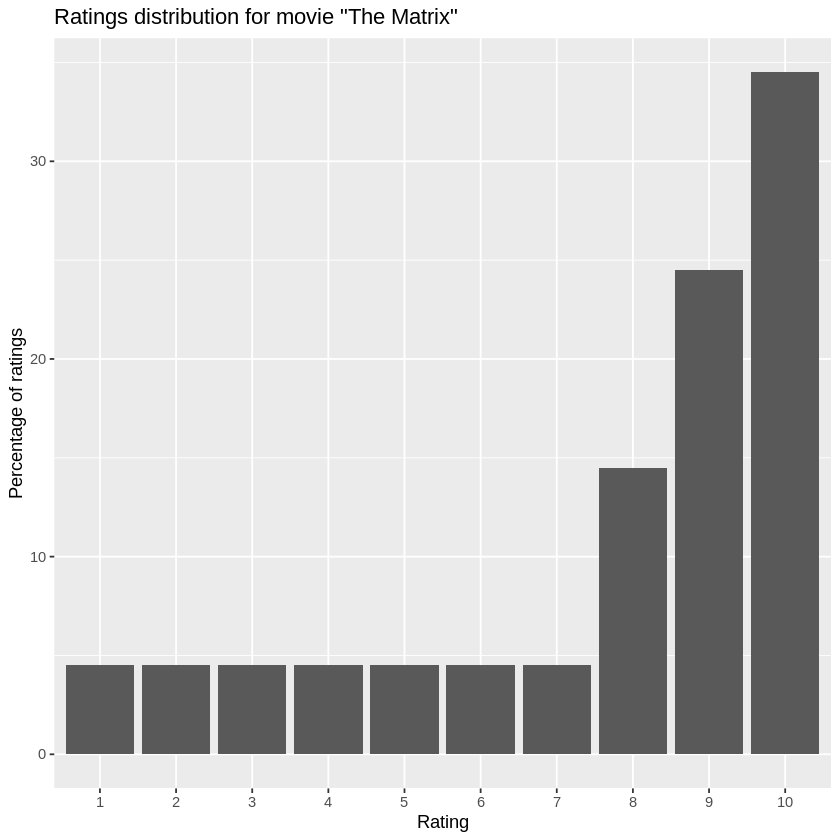

In [39]:
movies %>%
    filter(title == 'Matrix, The') %>%
    select(r1:r10) %>%
    gather(key='rating',value='percentage',factor_key=T) %>%
    mutate(rating=factor(as.integer(rating))) %>%
    ggplot(aes(x=rating,y=percentage)) +
            geom_col() +
            ggtitle('Ratings distribution for movie "The Matrix"') +
            xlab('Rating') +
            ylab('Percentage of ratings')

Seems pretty popular.

There's a lot to unpack on in the example. Lets go through it one step at a time.

The Matrix had its title written as "Matrix, The" instead of "The Matrix". If you do not know the formatting used in the dataset you might want to find all movies with "Matrix" in the title.

To do this we need to use the `filter` function, `str_detect`-function and the pipe operator `%>%`.

In [4]:
# Find all movies with Matrix in the title
movies %>%
    filter(str_detect(title,'Matrix'))

title,year,length,budget,rating,votes,r1,r2,r3,r4,⋯,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
"Matrix Reloaded, The",2003,138,127000000,7.1,57225,4.5,4.5,4.5,4.5,⋯,14.5,14.5,R,1,0,0,0,0,0,0
"Matrix Revolutions, The",2003,125,110000000,6.3,40058,4.5,4.5,4.5,4.5,⋯,4.5,14.5,R,1,0,0,0,0,0,0
"Matrix, The",1999,136,63000000,8.5,143853,4.5,4.5,4.5,4.5,⋯,24.5,34.5,R,1,0,0,0,0,0,0
Sex Files: Sexual Matrix,1999,79,NA,3.2,52,24.5,4.5,14.5,14.5,⋯,4.5,4.5,R,0,0,0,1,0,0,0
That 70's Matrix,2001,35,1200,3.9,24,34.5,4.5,0.0,4.5,⋯,0.0,24.5,,1,0,1,0,0,0,1


Pipe `%>%` is used to minimize this kind of code:

```r
a <- data.frame(...)
a_tmp1 <- func1(a)
a_tmp2 <- func2(a_tmp1)
b <- func3(a_tmp2)
```

With `tibble` and `%>%` the previous code block would be

```r
a <- tibble(...)
b <- a %>% 
    func1() %>% 
    func2() %>%
    func3()
```

Basically the pipe-operator puts output from left side to the first argument of the function call on the right side.

In Tidyverse the functions `func1` etc. are called "verbs" and they return a `tibble` as their output. Thus the object type of input and output are the same and the pipe can be chained across multiple calls. The pipe structure works with other functions as well, but with Tidyverse verbs you can be certain that the object does not change along the way.

Using the pipe produces code that has the data pipeline clearly visible.

Here we used the `filter`-verb to filter data based on data's values. The argument it takes is a logical statement about some column or as it is this case, a function call that checks whether "Matrix" can be found in column "title". (See e.g. this blog post for various filter possibilites [[1]](https://data-se.netlify.com/2016/12/21/dplyr_filter/))

Now that we know the exact title let's pick it.

In [5]:
# Pick the 'Matrix, The'
movies %>%
    filter(title == 'Matrix, The')

title,year,length,budget,rating,votes,r1,r2,r3,r4,⋯,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
"Matrix, The",1999,136,63000000,8.5,143853,4.5,4.5,4.5,4.5,⋯,24.5,34.5,R,1,0,0,0,0,0,0


The rating vote percentages are stored in columns `r1` to `r10`. Let's use verb `select` to select columns based on their names.

In [6]:
# Get rating distribution for 'Matrix,The'

movies %>%
    filter(title == 'Matrix, The') %>%
    select(r1,r2,r3,r4,r5,r6,r7,r8,r9,r10)

r1,r2,r3,r4,r5,r6,r7,r8,r9,r10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.5,4.5,4.5,4.5,4.5,4.5,4.5,14.5,24.5,34.5


This is a bit too much manual labor so, as the columns are ordered, lets take a range of columns from `r1` to `r10`.

In [41]:
# Get rating distribution in a more usable fashion
movies %>%
    filter(title == 'Matrix, The') %>%
    select(r1:r10)

r1,r2,r3,r4,r5,r6,r7,r8,r9,r10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.5,4.5,4.5,4.5,4.5,4.5,4.5,14.5,24.5,34.5


If the columns weren't ordered, we could have used the function `num_range` from [select_helpers](http://dplyr.tidyverse.org/reference/select_helpers.html) to choose all rows starting with "r" and having a number from range `1:10` at the end. 

In [44]:
# Another solution for choosing columns
movies %>%
    filter(title == 'Matrix, The') %>%
    select(num_range('r',1:10))

r1,r2,r3,r4,r5,r6,r7,r8,r9,r10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.5,4.5,4.5,4.5,4.5,4.5,4.5,14.5,24.5,34.5


Now we got what we want to plot, but the data is in a wrong ordering. Remember that in tidy format columns were meant to be variables and rows were meant to be observations. As each user can vote for a single rating, the columns `r1` to `r10` are not independent variables. Instead we want to have columns `rating`, that describes the rating that has been given, and `percentage`, that describes the percentage of votes given to this particular rating. 

To achieve this we can use `gather`-function from tidyr-package. [[1]](http://tidyr.tidyverse.org/reference/gather.html)

`gather` can be used to take columns into rows. Here the `key` parameter is the name of the new variable 

By settings `factor_key=T` the column names are stored as a `factor`. `factor` stores a mapping between strings and integers and then represents the data as a `vector` of integer. So basically `r1` is `1`, `r2`,`2`, etc. This preserves the ordering. `factor`s are useful for string data that can be ordered or categorized (identical strings have same `integer` mapped to them).

In [51]:
movies %>%
    filter(title == 'Matrix, The') %>%
    select(r1:r10) %>%
    gather(key='rating',value='percentage',factor_key=T)

rating,percentage
<fct>,<dbl>
r1,4.5
r2,4.5
r3,4.5
r4,4.5
r5,4.5
r6,4.5
r7,4.5
r8,14.5
r9,24.5


Now we want to plot the result. To do this let's use functions from ggplot2.

`ggplot2` function can be used to create a figure. It takes as its argument an `aes` or aesthetic mapping that defines which columns are mapped to which axes.

After specifying the figure one can use calls to various ggplot2-functions to add plots or properties to the figure.
`+`-operator is used to sum all of these together.

In this case let's use `geom_col` to create a bar plot. It sets bars heights based on data values. [[1]](http://ggplot2.tidyverse.org/reference/geom_bar.html)


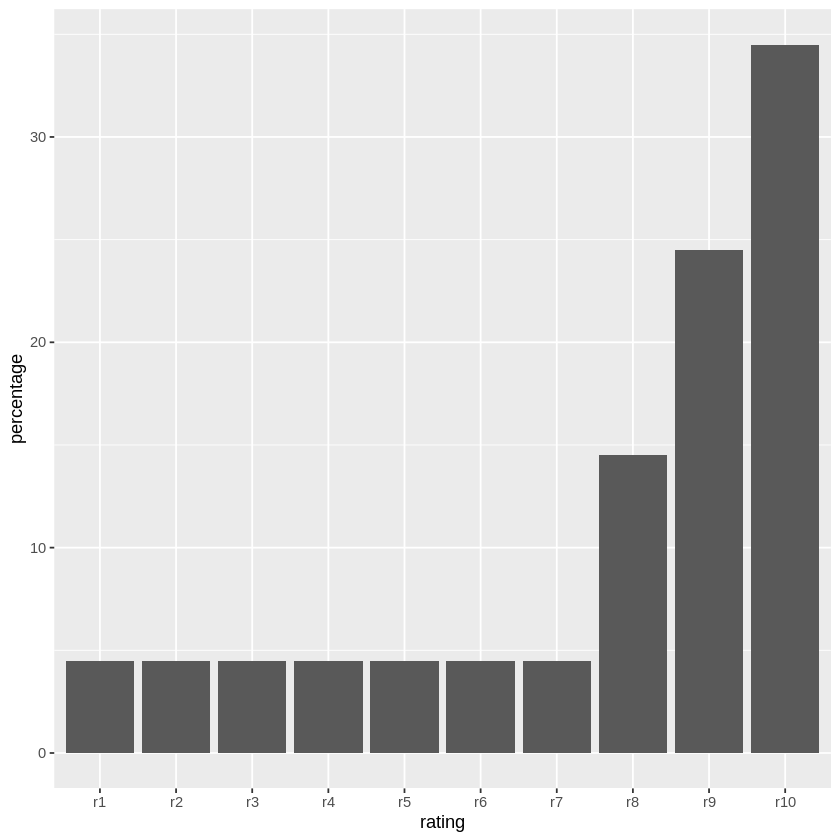

In [50]:
movies %>%
    filter(title == 'Matrix, The') %>%
    select(r1:r10) %>%
    gather(key='rating',value='percentage',factor_key=T) %>%
    ggplot(aes(x=rating,y=percentage)) +
            geom_col()

This plot is already something, but we can make it more beautiful. Let's change the ratings from `r1` to `1` etc.. As rating-variable is a `factor` (basically a `vector` of integers), we can use `mutate`-verb with `as.integer` to make the conversion.

`mutate` can be used to create new variables or to modify existing ones. It keeps rest of the variables intact. `transmute` would drop rest of the variables. [[1]](http://dplyr.tidyverse.org/reference/mutate.html)

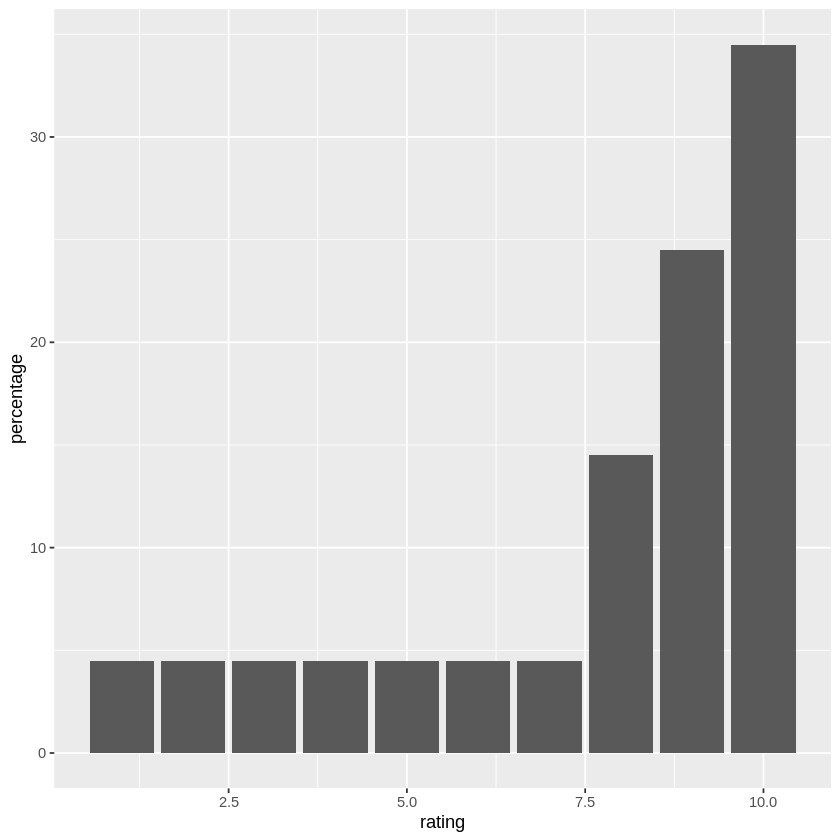

In [49]:
movies %>%
    filter(title == 'Matrix, The') %>%
    select(r1:r10) %>%
    gather(key='rating',value='percentage',factor_key=T) %>%
    mutate(rating=as.integer(rating)) %>%
    ggplot(aes(x=rating,y=percentage)) +
            geom_col()

This worked, but now the x-axis looks bad. Lets convert the rating to `factor` so that x-axis is strings instead of integers.

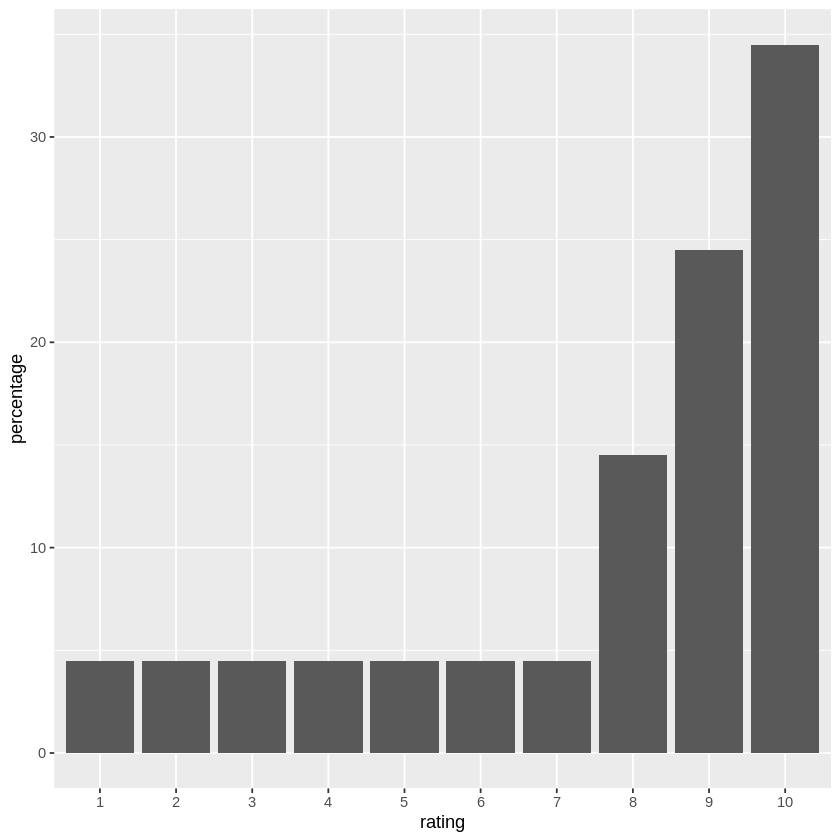

In [48]:
movies %>%
    filter(title == 'Matrix, The') %>%
    select(r1:r10) %>%
    gather(key='rating',value='percentage',factor_key=T) %>%
    mutate(rating=factor(as.integer(rating))) %>%
    ggplot(aes(x=rating,y=percentage)) +
            geom_col()

Great. Lets finish the job by specifying axis labels with `xlab` and  `ylab` and specifying title with `ggtitle`. [[1]](http://ggplot2.tidyverse.org/reference/labs.html)

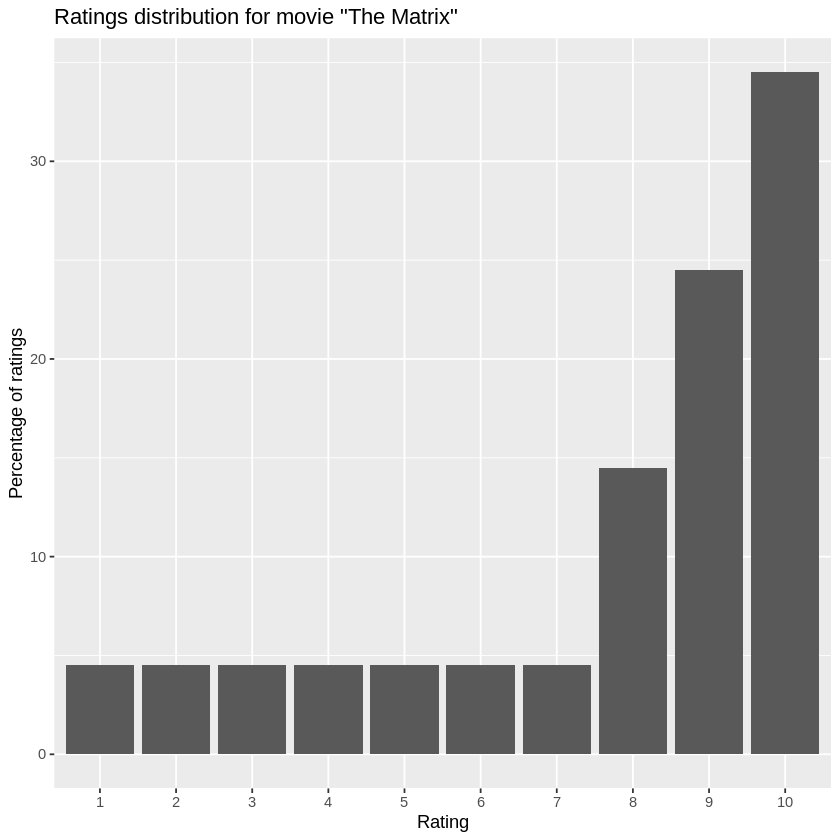

In [47]:
movies %>%
    filter(title == 'Matrix, The') %>%
    select(r1:r10) %>%
    gather(key='rating',value='percentage',factor_key=T) %>%
    mutate(rating=factor(as.integer(rating))) %>%
    ggplot(aes(x=rating,y=percentage)) +
            geom_col() +
            ggtitle('Ratings distribution for movie "The Matrix"') +
            xlab('Rating') +
            ylab('Percentage of ratings')

This looks nice. With small additions one can even plot the whole trilogy.

Here:
1. Movies were chosen based on whether both "Matrix" and "The" were present in title.
2. Columns year and title were included with the select-statement.
3. Title and year were excluded from column gathering with `-title` and `-year`.
4. In `aes`-mapping the `fill` keyword was used to specify the fill colour names. By using `reorder` the titles were re-ordered based on publishing year.
5. x-, y- and fill-labels were set using `labs`-function.


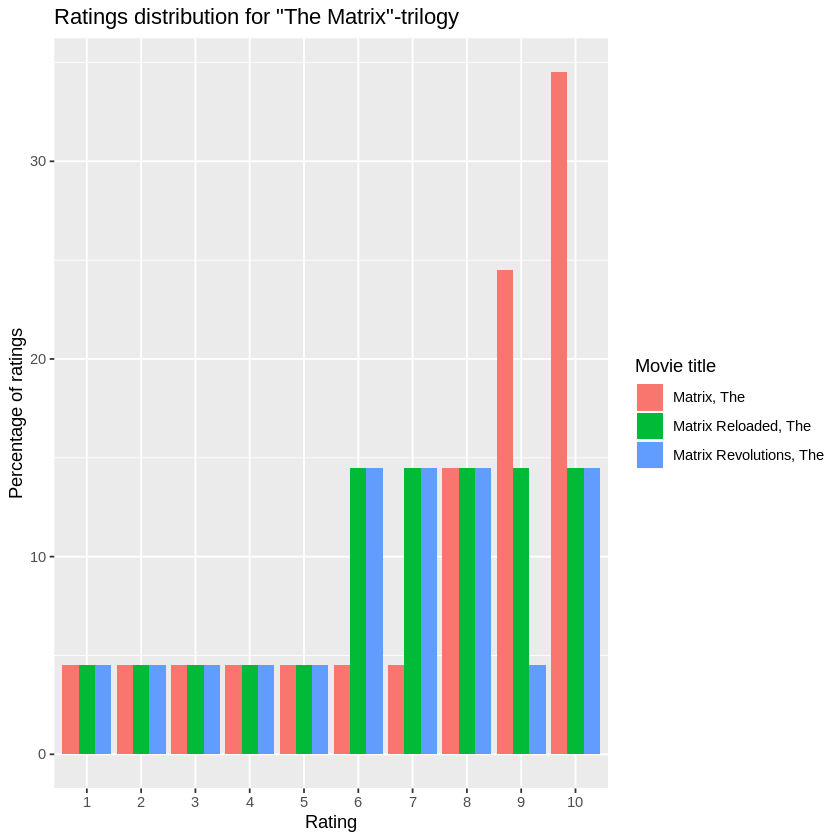

In [46]:
movies %>%
    filter(str_detect(title,'Matrix') & str_detect(title,'The')) %>%
    select(r1:r10,title,year) %>%
    gather(key='rating',value='percentage',-title,-year,factor_key=T) %>%
    mutate(rating=factor(as.integer(rating))) %>%
    ggplot(aes(x=rating,y=percentage,fill=reorder(title,year))) +
            geom_col(position='dodge') +
            ggtitle('Ratings distribution for "The Matrix"-trilogy') +
            labs(x='Rating',y='Percentage of ratings',fill='Movie title')

# Exercise time: 

1. Use `filter` and `geom_histogram` to plot a histogram of ratings for action-movies (Doc pages: [[filter]](http://dplyr.tidyverse.org/reference/filter.html) [[geom_histogram]](http://ggplot2.tidyverse.org/reference/geom_histogram.html)).
2. Use `filter` and `arrange` to find the highest rated romance-movie with more than 1000 votes (Doc pages: [[filter]](http://dplyr.tidyverse.org/reference/filter.html) [[arrange]](https://www.rdocumentation.org/packages/dplyr/versions/0.7.3/topics/arrange)).
3. Take movies with more than 1000 votes and an estimated budget (`! is.na(budget)`). Use `top_n` to limit yourself to 200 highest rated. Use `geom_point` and `scale_x_log10` to create a semi-log scatter plot of movie budget vs. movie rating ([[top_n]](http://dplyr.tidyverse.org/reference/top_n.html) [[geom_point]](http://ggplot2.tidyverse.org/reference/geom_point.html) [[scale_x_log10]](http://ggplot2.tidyverse.org/reference/scale_continuous.html)).